Matplotlib is building the font cache; this may take a moment.
/var/folders/l0/gw809rqn4v501w_74_g3z8q40000gn/T/ipykernel_36566/1717101873.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='region', data=df, order=df['region'].value_counts().index, palette='viridis')


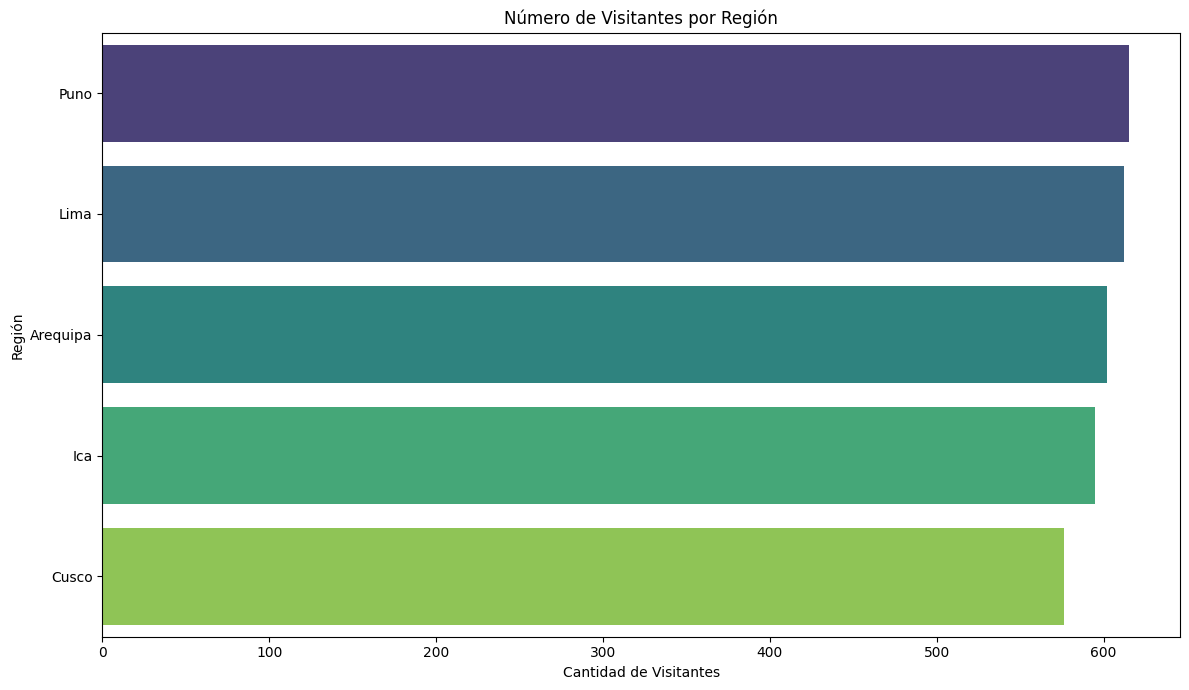

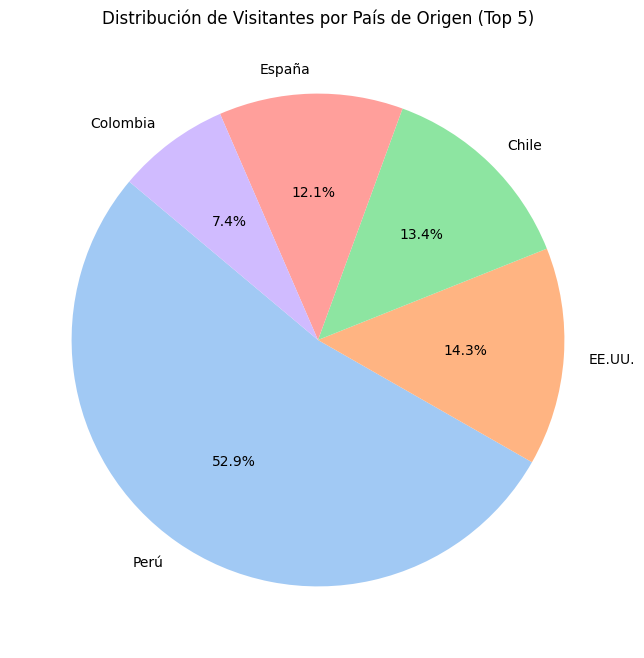

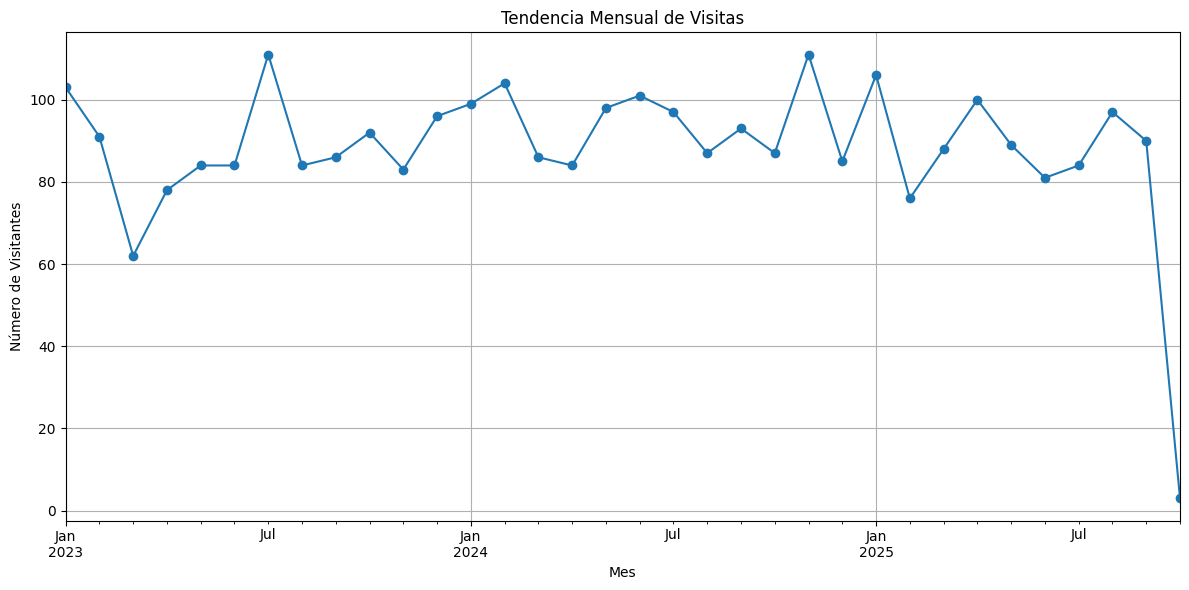

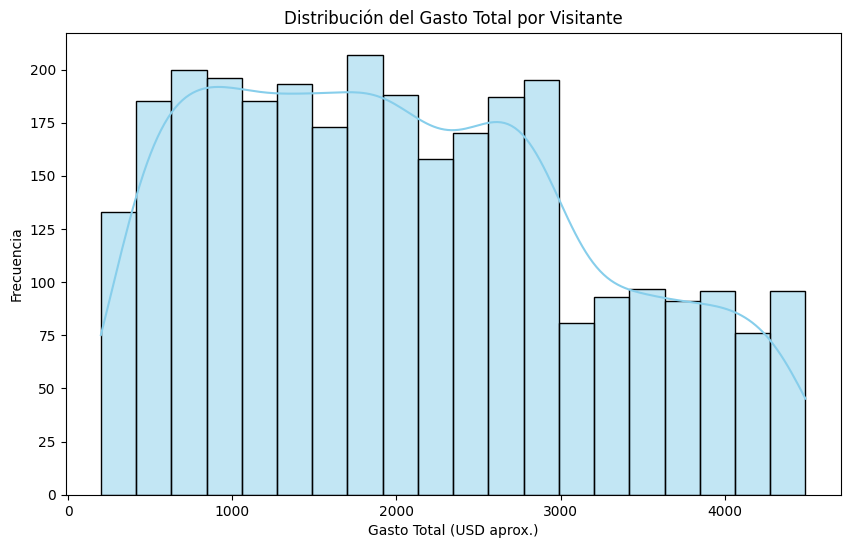

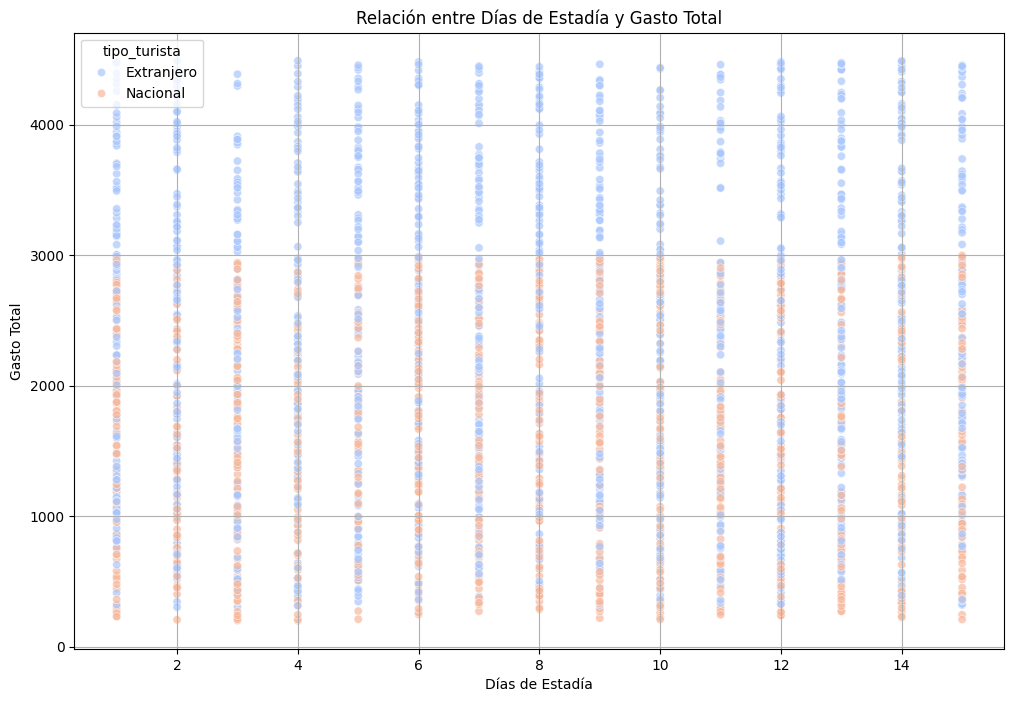

In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conectar a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["TurismoPeru_2025"]
collection = db["Visitantes"]

# Extraer datos y convertirlos a DataFrame
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)
df['fecha_visita'] = pd.to_datetime(df['fecha_visita'])

# Crear carpeta para reportes
reports_path = Path.cwd().parent / "reports"
reports_path.mkdir(exist_ok=True)

# 1. Gráfico de barras: Visitantes por región
plt.figure(figsize=(12, 7))
sns.countplot(y='region', data=df, order=df['region'].value_counts().index, palette='viridis')
plt.title('Número de Visitantes por Región')
plt.xlabel('Cantidad de Visitantes')
plt.ylabel('Región')
plt.tight_layout()
plt.savefig(reports_path / "Visitantes_por_Región.png")
plt.show()

# 2. Gráfico circular: Distribución por país de origen (Top 5)
top_paises = df['pais_origen'].value_counts().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_paises, labels=top_paises.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Visitantes por País de Origen (Top 5)')
plt.ylabel('')
plt.savefig(reports_path / "Visitantes_por_País_de_Origen.png")
plt.show()

# 3. Gráfico de línea: Tendencia mensual de visitas
df['mes_visita'] = df['fecha_visita'].dt.to_period('M')
visitas_mensuales = df['mes_visita'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
visitas_mensuales.plot(kind='line', marker='o')
plt.title('Tendencia Mensual de Visitas')
plt.xlabel('Mes')
plt.ylabel('Número de Visitantes')
plt.grid(True)
plt.tight_layout()
# plt.savefig(reports_path / "Tendencia_Mensual.png") # Descomentar si se quiere guardar
plt.show()


# 4. Histograma: Gasto promedio por visitante
plt.figure(figsize=(10, 6))
sns.histplot(df['gasto_total'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Gasto Total por Visitante')
plt.xlabel('Gasto Total (USD aprox.)')
plt.ylabel('Frecuencia')
plt.savefig(reports_path / "Gasto_Promedio_por_Región.png")
plt.show()

# 5. Desafío Extra: Scatter plot (Días de estadía vs Gasto total)
df['tipo_turista'] = df['pais_origen'].apply(lambda x: 'Nacional' if x == 'Perú' else 'Extranjero')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='dias_estadia', y='gasto_total', hue='tipo_turista', palette='coolwarm', alpha=0.7)
plt.title('Relación entre Días de Estadía y Gasto Total')
plt.xlabel('Días de Estadía')
plt.ylabel('Gasto Total')
plt.grid(True)
# plt.savefig(reports_path / "Estadia_vs_Gasto.png") # Descomentar si se quiere guardar
plt.show()